Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introduction to Vibration Theory


## Test P1 (2022/1): time and frequency domain analysis of sdof systems

---

**NAME:** <br/>
**CARD:** 


#### Instruções

1. Entregar a resolução da prova em arquivo único, com no máximo 10Mb, até as 18h de hoje, 25 de abril de 2022.
2. Recomenda-se verificar atentamente se todas as folhas da resolução foram incluídas no arquivo gerado, pois não serão aceitas entregas posteriores.
3. Na primeira folha do arquivo deve constar claramente o NOME e o cartão de MATRÍCULA.
4. A consulta ao material de estudo e o uso do computador para cálculos são LIVRES.
5. A prova deve ser realizada INDIVIDUALMENTE, sem recorrer ao auxílio de colegas ou outras pessoas! Caso se verifique o descumprimento desta regra, todos os envolvidos na fraude terão a nota da prova zerada.


In [1]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import matplotlib.pyplot as plt
from MRPy import *


## Questão 1

Um cabo com comportamento elástico linear é disposto horizontalmente.
O cabo tem comprimento total $L = 4{\rm m}$, 
rigidez axial $EA = 4000{\rm kN}$, e uma massa $m = 20{\rm kg}$ 
fixada no seu centro. O cabo tem uma protensão inicial $T_0 = 20{\rm kN}$. 
O amortecimento do sistema é $\zeta = 0.01$ (razão do crítico).
A rigidez à flexão bem como a massa do cabo são desprezáveis.
A aceleração da gravidade no local é $g = 9.81{\rm m/s^2}$.
O _grau de liberdade_ considerado é o deslocamento vertical da massa $m$.

<img src="resources/tests/PEC00025A_221_P1_Q1.png" alt="Question 1" width="680px"/>


Admitindo-se uma condição de pequenos deslocamentos, pergunta-se:

1. Qual o deslocamento $u_{\rm est}$ devido ao peso próprio?
2. Qual a frequência natural de vibração livre do sistema cabo-massa?
3. Liberando-se a massa a partir da posição $u(0) = 0{\rm m}$, sob ação da gravidade, qual a maior amplitude atingida por $u(t)$? 
4. Desconsiderando-se a parcela estática do deslocamento e dado um deslocamento inicial $u_0 = 4{\rm cm}$, qual o tempo transcorrido até que a amplitude de vibração caia à metade deste valor? 


In [2]:
L  =  4.
m  =  20.
zt =  0.01
T0 =  20000. 
g  =  9.81

k  =  4*T0/L

ug =  m*g/k
fn =  np.sqrt(k/m)/2/np.pi
N  =  np.log(2)/(2*np.pi*zt)

print('   A rigidez ligada à massa é {0:4.0f}mm.\n'.format(k))
print('1) Deslocamento por peso póprio é {0:3.2f}mm.\n'.format(1000*ug))
print('2) Frequência natural é {0:3.2f}Hz.\n'.format(fn))
print('3) Deslocamento dinâmico é {0:5.2f}mm.\n'.format(2000*ug))
print('4) Tempo até meia amplitude é {0:3.2f}s. \n'.format(N/fn))


   A rigidez ligada à massa é 20000mm.

1) Deslocamento por peso póprio é 9.81mm.

2) Frequência natural é 5.03Hz.

3) Deslocamento dinâmico é 19.62mm.

4) Tempo até meia amplitude é 2.19s. 



## Questão 2

A massa central do problema anterior é submetida a uma carga transiente, $F(t)$, dada pela função abaixo, 
com amplitude $F_0 = 500{\rm N}$ e duração $T_{\rm d} = 0.5{\rm s}$. 
A variável $\tau$ representa o tempo adimensionalizado por $T_{\rm d}$.

<img src="resources/tests/PEC00025A_221_P1_Q2.png" alt="Question 2" width="480px"/>  


Desconsiderando-se a parcela estática da resposta (devida ao peso próprio), pergunta-se:

1. Qual o maior amplitude de deslocamento atingida?
2. Qual o fator de amplificação dinâmica para este carregamento?


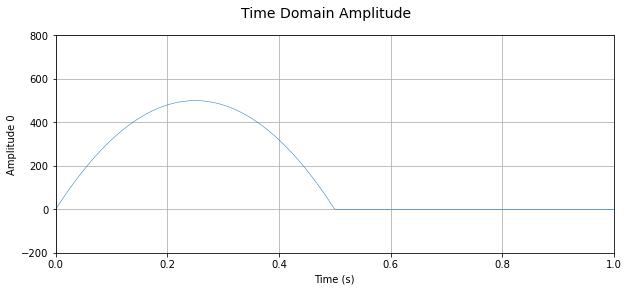

In [3]:
Td = 0.5
F0 = 500.
t  = np.linspace(0, 2*Td, 512)
τ  = t/Td
fs = 512/(2*Td)

F   = 4*F0*(τ - τ**2)
F[t > Td] = 0.
F   = MRPy(F, fs=fs)

F.plot_time(fig=1, figsize=(10,4), axis_t=[0, 2*Td, -200, 800]);


0) Deslocamento estático é 25.00mm.

1) Deslocamento de pico é 28.40mm.

2) Amplificação dinâmica é 1.14 (adim.).



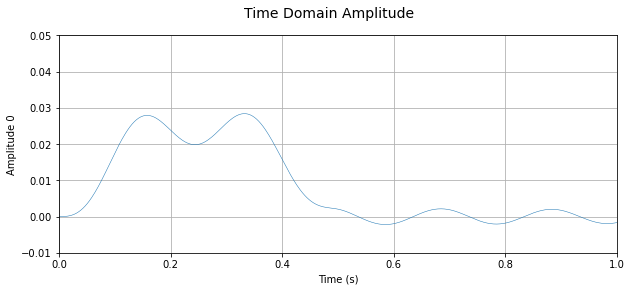

In [4]:
u  =  F.sdof_Duhamel(fn, zt, U0=0., V0=0.)/m

u.plot_time(fig=2, figsize=(10,4), axis_t=[0, 2*Td,-0.01, 0.05]);

ue  =  F0/k
up  =  u.max()

print('0) Deslocamento estático é {0:3.2f}mm.\n'.format(1000*ue))
print('1) Deslocamento de pico é {0:3.2f}mm.\n'.format(1000*up))
print('2) Amplificação dinâmica é {0:3.2f} (adim.).\n'.format(up/ue))


## Questão 3

Uma viga com comportamento elástico linear é disposta horizontalmente.
A viga tem comprimento total $L = 4{\rm m}$, 
rigidez à flexão $EI = 6.5{\rm kN m^2}$, e uma massa $m = 20{\rm kg}$ 
fixada no seu centro.
O amortecimento do sistema é $\zeta = 0.01$ (razão do crítico).
A massa da viga é desprezável.
A aceleração da gravidade no local é $g = 9.81{\rm m/s^2}$.
O _grau de liberdade_ considerado é o deslocamento vertical da massa $m$.

<img src="resources/tests/PEC00025A_221_P1_Q3.png" alt="Question 3" width="600px"/>  


Pergunta-se:

1. Qual o deslocamento $u_{\rm est}$ devido ao peso próprio?
2. Qual a frequência natural de vibração livre do sistema viga-massa?
3. Liberando-se a massa a partir da posição $u(0) = 0{\rm m}$, qual a maior amplitude atingida por $u(t)$ devida à ação da gravidade? 
4. Desconsiderando-se a parcela estática do deslocamento e dado um deslocamento inicial $u_0 = 4{\rm cm}$, qual o tempo transcorrido até que a amplitude de vibração caia à metade deste valor? 


In [5]:
L  =  4.
m  =  20.
EI =  6500.
zt =  0.01
g  =  9.81

k  =  48*EI/(L**3)

ug =  m*g/k
fn =  np.sqrt(k/m)/2/np.pi
N  =  np.log(2)/(2*np.pi*zt)

print('1) Deslocamento estático é {0:3.2f}mm.\n'.format(1000*ug))
print('2) Frequência natural é {0:3.2f}Hz.\n'.format(fn))
print('3) Pico do deslocamento dinâmico é {0:3.2f}mm.\n'.format(2000*ug))
print('4) Tempo até meia amplitude é {0:3.2f}s. \n'.format(N/fn))


1) Deslocamento estático é 40.25mm.

2) Frequência natural é 2.48Hz.

3) Pico do deslocamento dinâmico é 80.49mm.

4) Tempo até meia amplitude é 4.44s. 



## Questão 4

A extremidade esquerda da viga é submetida a uma aceleração sísmica $a(t)$ com densidade espectral $S_a(f)$,
dada na figura abaixo, onde $\sigma_a = 0.1g$ (10% da gravidade) e $r = 10$ (eixo das frequências em hertz). 

<img src="resources/tests/PEC00025A_221_P1_Q4.png" alt="Question 4" width="420px"/>  


Admitindo-se que a força sísmica na massa central é dada aproximadamente pelo produto da massa pela metade da 
aceleração no apoio esquerdo, conforme indicado na figura da viga, e fazendo-se a hipótese de pequenos deslocamentos, 
pergunta-se:

1. Qual o valor r.m.s. da resposta em deslocamento $u(t)$?
2. Qual o valor r.m.s. da resposta em aceleração $\ddot{u}(t)$?
3. Qual o valor de pico do deslocamento esperado para 1 minuto de excitação estacionária?


#### 4.1 Solução no domínio da frequência


Amplitude r.m.s. pela integral do espectro é 0.10g.



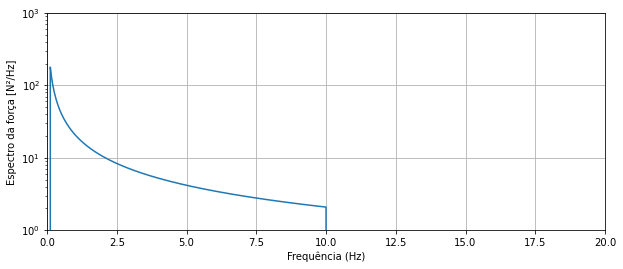

In [6]:
M  =  1025
σa =  0.1*g
r  =  10.
f  =  np.linspace(0, 2*r, M)
fs =  2*f[-1]

Sa =  np.zeros_like(f)

Sa[f > 1/r] = (σa**2)/(2*np.log(r))*(1/f[f > 1/r])
Sa[f < 1/r] =  0.
Sa[f >  r ] =  0.

sa2 =  np.trapz(Sa, f)
sa  =  np.sqrt(sa2)/g

print('Amplitude r.m.s. pela integral do espectro é {0:3.2f}g.\n'.format(sa))

SF  = ((m/2)**2)*Sa

plt.figure(3, figsize=(10,4), clear=True)
plt.semilogy(f, SF);
plt.grid(True)
plt.axis([0, 2*r, 1e-0, 1e3])
plt.xlabel('Frequência (Hz)')
plt.ylabel('Espectro da força [N²/Hz]');


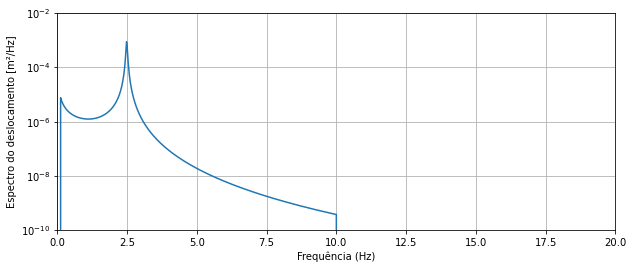

In [7]:
H2  =  lambda fi: 1/( (1 - (fi/fn)**2)**2 + (2*zt*(fi/fn))**2 )/(k**2)
Su  =  H2(f)*SF

plt.figure(4, figsize=(10,4), clear=True)
plt.semilogy(f, Su);
plt.grid(True)
plt.axis([0, 2*r, 1e-10, 1e-2])
plt.xlabel('Frequência (Hz)')
plt.ylabel('Espectro do deslocamento [m²/Hz]');


In [8]:
su2 =  np.trapz(    Su, f)
su4 =  np.trapz(f*f*Su, f)

nu  =  np.sqrt(su4/su2)
lnu =  np.sqrt(2*np.log(60*nu))    # Tempo de excitação é 60 segundos!
g   =  lnu + 0.5772/lnu

su  =  1000*np.sqrt(su2)
up  =  g*su

SaG = ((2*np.pi*f)**4)*Su
sa  =  np.sqrt(np.trapz(SaG, f))

print('(Fator de pico da resposta em deslocamento é {0:3.2f})\n'.format(g))
print('1) Amplitude r.m.s. da resposta em deslocamento é {0:3.2f}mm.\n'.format(su))
print('2) Amplitude r.m.s. da resposta em aceleração é {0:5.4f}m/s².\n'.format(sa))
print('3) Amplitude de pico da resposta (60s) é {0:3.2f}mm.\n'.format(up))

print(nu)

(Fator de pico da resposta em deslocamento é 3.34)

1) Amplitude r.m.s. da resposta em deslocamento é 8.45mm.

2) Amplitude r.m.s. da resposta em aceleração é 2.0363m/s².

3) Amplitude de pico da resposta (60s) é 28.22mm.

2.4360232902931918


#### 4.2 Solução no domínio do tempo por simulação

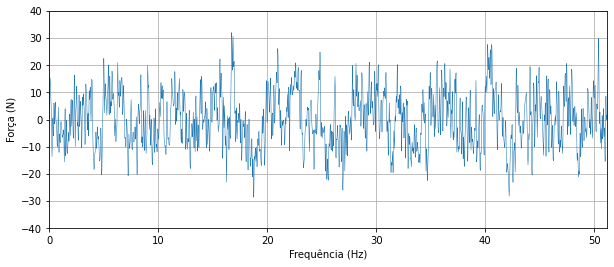

In [9]:
Fa = MRPy.from_periodogram(SF, fs=fs)
t  = Fa.t_axis()

plt.figure(5, figsize=(10,4), clear=True)
plt.plot(t, Fa[0], lw=0.5);
plt.grid(True)
plt.axis([0, Fa.Td, -40, 40])
plt.xlabel('Frequência (Hz)')
plt.ylabel('Força (N)');


1) Amplitude r.m.s. da resposta em deslocamento é 8.46mm.

3) Amplitude de pico da resposta (60s) é 24.47mm.



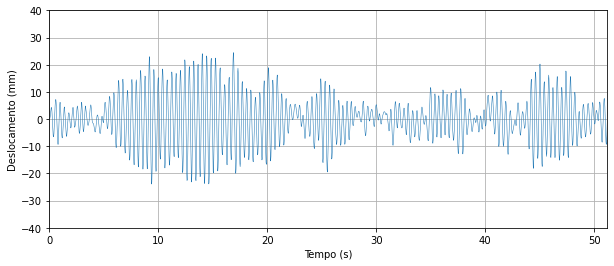

In [10]:
Ua  =  Fa.sdof_Duhamel(fn, zt)/m

sua =  Ua.std()
pua =  np.max(np.abs(Ua))

print('1) Amplitude r.m.s. da resposta em deslocamento é {0:3.2f}mm.\n'.format(1000*sua))
print('3) Amplitude de pico da resposta (60s) é {0:3.2f}mm.\n'.format(1000*pua))

plt.figure(6, figsize=(10,4), clear=True)
plt.plot(t, 1000*Ua[0], lw=0.5);
plt.grid(True)
plt.axis([0, Ua.Td, -40, 40])
plt.xlabel('Tempo (s)')
plt.ylabel('Deslocamento (mm)');


2) Amplitude r.m.s. da resposta em aceleração é 2.0454m/s².



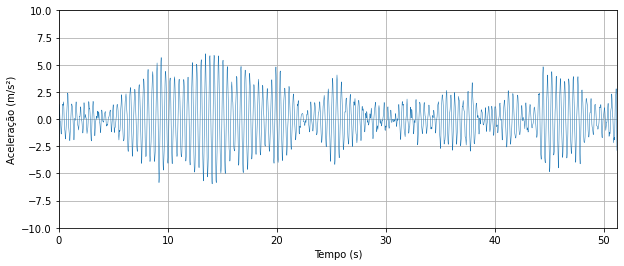

In [11]:
a   =  Ua.differentiate(band=[1/r, r])
a   =   a.differentiate(band=[1/r, r])

print('2) Amplitude r.m.s. da resposta em aceleração é {0:5.4f}m/s².\n'.format(a.std()))

plt.figure(7, figsize=(10,4), clear=True)
plt.plot(t, a[0], lw=0.5);
plt.grid(True)
plt.axis([0, a.Td, -10, 10])
plt.xlabel('Tempo (s)')
plt.ylabel('Aceleração (m/s²)');


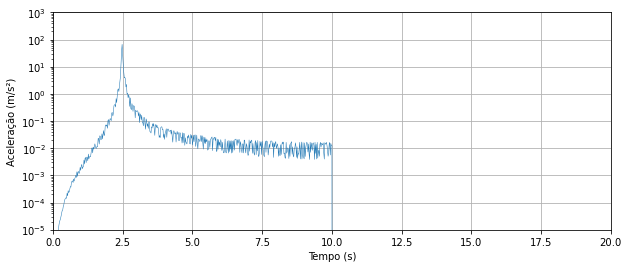

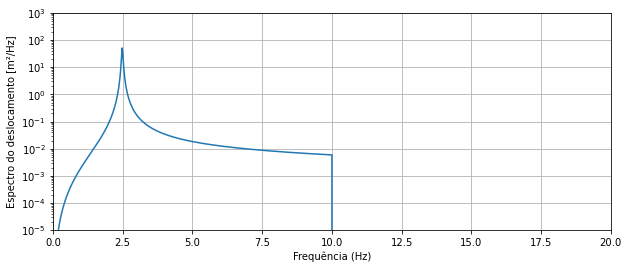

In [12]:
Sa, fs = a.periodogram()

plt.figure(8, figsize=(10,4), clear=True)
plt.semilogy(a.f_axis(), Sa[0], lw=0.5);
plt.grid(True)
plt.axis([0, 2*r, 1e-5, 1e3])
plt.xlabel('Tempo (s)')
plt.ylabel('Aceleração (m/s²)');

plt.figure(9, figsize=(10,4), clear=True)
plt.semilogy(f, SaG);
plt.grid(True)
plt.axis([0, 2*r, 1e-5, 1e3])
plt.xlabel('Frequência (Hz)')
plt.ylabel('Espectro do deslocamento [m²/Hz]');
